## Analyze A/B Test Results

This project will assure you have mastered the subjects covered in the statistics lessons.  The hope is to have this project be as comprehensive of these topics as possible.  Good luck!

## Table of Contents
- [Introduction](#intro)
- [Part I - Probability](#probability)
- [Part II - A/B Test](#ab_test)
- [Part III - Regression](#regression)


<a id='intro'></a>
### Introduction

A/B tests are very commonly performed by data analysts and data scientists.  It is important that you get some practice working with the difficulties of these 

For this project, you will be working to understand the results of an A/B test run by an e-commerce website.  Your goal is to work through this notebook to help the company understand if they should implement the new page, keep the old page, or perhaps run the experiment longer to make their decision.

**As you work through this notebook, follow along in the classroom and answer the corresponding quiz questions associated with each question.** The labels for each classroom concept are provided for each question.  This will assure you are on the right track as you work through the project, and you can feel more confident in your final submission meeting the criteria.  As a final check, assure you meet all the criteria on the [RUBRIC](https://review.udacity.com/#!/projects/37e27304-ad47-4eb0-a1ab-8c12f60e43d0/rubric).

<a id='probability'></a>
#### Part I - Probability

To get started, let's import our libraries.

In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
%matplotlib inline
#We are setting the seed to assure you get the same answers on quizzes as we set up
random.seed(42)

`1.` Now, read in the `ab_data.csv` data. Store it in `df`.  **Use your dataframe to answer the questions in Quiz 1 of the classroom.**

a. Read in the dataset and take a look at the top few rows here:

In [2]:
#import the dataset and Store it in df
df = pd.read_csv('ab_data.csv')
#show the head of the data
df.head()

,user_id,timestamp,group,landing_page,converted
0,851104,2017-01-21 22:11:48.556739,control,old_page,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0
4,864975,2017-01-21 01:52:26.210827,control,old_page,1


b. Use the below cell to find the number of rows in the dataset.

In [3]:
# number of rows
print("num of rows in this dataset={}".format(df.shape[0]))


num of rows in this dataset=294478


c. The number of unique users in the dataset.

In [4]:
#number of unique users 
print("num of unique users={}".format(df.user_id.nunique()))


num of unique users=290584


d. The proportion of users converted.

In [5]:
#proportion of usere converted
print("proportion of usere converted={}".format(df.converted.mean()))


proportion of usere converted=0.11965919355605512


e. The number of times the `new_page` and `treatment` don't line up.

In [6]:
#get num of new page
n_page= df.landing_page.value_counts()['new_page']

#get num of all treatment
treatment= df.group.value_counts()['treatment']

#num of treatment and new page
treatment_n_page=len(df.query('group == "treatment" & landing_page == "new_page"'))

#The number of times the `new_page` and `treatment` don't line up.
print(" number of times the `new_page` and `treatment` don't line up={}".format(n_page-treatment_n_page+treatment-treatment_n_page))

 number of times the `new_page` and `treatment` don't line up=3893


f. Do any of the rows have missing values?

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 294478 entries, 0 to 294477
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   user_id       294478 non-null  int64 
 1   timestamp     294478 non-null  object
 2   group         294478 non-null  object
 3   landing_page  294478 non-null  object
 4   converted     294478 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 11.2+ MB


the cell above show that there are no missing values in the datase

`2.` For the rows where **treatment** is not aligned with **new_page** or **control** is not aligned with **old_page**, we cannot be sure if this row truly received the new or old page.  Use **Quiz 2** in the classroom to provide how we should handle these rows.  

a. Now use the answer to the quiz to create a new dataset that meets the specifications from the quiz.  Store your new dataframe in **df2**.

In [50]:
#remove these rows, so we wil create new dataframe without these rows
df2 = df[((df['group']=='treatment') & (df['landing_page']=='new_page')) |
         ((df['group']=='control') & (df['landing_page']=='old_page'))]

In [51]:
# Double Check all of the correct rows were removed - this should be 0
df2[((df2['group'] == 'treatment') == (df2['landing_page'] == 'new_page')) == False].shape[0]

0

`3.` Use **df2** and the cells below to answer questions for **Quiz3** in the classroom.

a. How many unique **user_id**s are in **df2**?

In [52]:
#number of unique users in df2
print("num of unique users={}".format(df2.user_id.nunique()))


num of unique users=290584


b. There is one **user_id** repeated in **df2**.  What is it?

In [53]:
#find  the duplicate user_id
df2[df2['user_id'].duplicated()]['user_id']

2893    773192
Name: user_id, dtype: int64

c. What is the row information for the repeat **user_id**? 

In [54]:
df2[df2.duplicated(['user_id'])]

,user_id,timestamp,group,landing_page,converted
2893,773192,2017-01-14 02:55:59.590927,treatment,new_page,0


d. Remove **one** of the rows with a duplicate **user_id**, but keep your dataframe as **df2**.

In [55]:
df2 = df2.drop_duplicates(subset='user_id');
df2.shape

(290584, 5)

`4.` Use **df2** in the below cells to answer the quiz questions related to **Quiz 4** in the classroom.

a. What is the probability of an individual converting regardless of the page they receive?

In [56]:
#probability of an individual converting regardless of the page they receive
print("probability of an individual converting={}".format(df2.converted.mean()))

probability of an individual converting=0.11959708724499628


b. Given that an individual was in the `control` group, what is the probability they converted?

In [57]:
df2.query('group =="control"').converted.mean()

0.1203863045004612

c. Given that an individual was in the `treatment` group, what is the probability they converted?

In [58]:
df2.query('group =="treatment"').converted.mean()


0.11880806551510564

d. What is the probability that an individual received the new page?

In [59]:
len(df2[df2['landing_page'] == 'new_page'])/len(df2)

0.5000619442226688

e. Consider your results from a. through d. above, and explain below whether you think there is sufficient evidence to say that the new treatment page leads to more conversions.

No, because there is no enough evidence to take a decision about leaving the old page or change to new page, we still need to statistical significance calculate p-value for the new and old pages and define the test hypothesis as the result above doesn't enough it gives that Half of the population received the old_page and half of the population received the new_page as the control group has a slightly higher conversion rate (0.1204) than the treatment group (0.1195),however, these results don't provide a solid evidence. 

<a id='ab_test'></a>
### Part II - A/B Test

Notice that because of the time stamp associated with each event, you could technically run a hypothesis test continuously as each observation was observed.  

However, then the hard question is do you stop as soon as one page is considered significantly better than another or does it need to happen consistently for a certain amount of time?  How long do you run to render a decision that neither page is better than another?  

These questions are the difficult parts associated with A/B tests in general.  


`1.` For now, consider you need to make the decision just based on all the data provided.  If you want to assume that the old page is better unless the new page proves to be definitely better at a Type I error rate of 5%, what should your null and alternative hypotheses be?  You can state your hypothesis in terms of words or in terms of **$p_{old}$** and **$p_{new}$**, which are the converted rates for the old and new pages.

**$$H_0: p_{new} <= p_{old}$$**
**$$H_1: p_{new} > p_{old}$$**

`2.` Assume under the null hypothesis, $p_{new}$ and $p_{old}$ both have "true" success rates equal to the **converted** success rate regardless of page - that is $p_{new}$ and $p_{old}$ are equal. Furthermore, assume they are equal to the **converted** rate in **ab_data.csv** regardless of the page. <br><br>

Use a sample size for each page equal to the ones in **ab_data.csv**.  <br><br>

Perform the sampling distribution for the difference in **converted** between the two pages over 10,000 iterations of calculating an estimate from the null.  <br><br>

Use the cells below to provide the necessary parts of this simulation.  If this doesn't make complete sense right now, don't worry - you are going to work through the problems below to complete this problem.  You can use **Quiz 5** in the classroom to make sure you are on the right track.<br><br>

a. What is the **convert rate** for $p_{new}$ under the null? 

In [60]:
#convert rate for 𝑝_𝑛𝑒𝑤 under the null
𝑝_𝑛𝑒𝑤=df2.converted.mean()
print("convert rate for 𝑝_𝑛𝑒𝑤 under the null={}".format(df2.converted.mean()))


convert rate for 𝑝_𝑛𝑒𝑤 under the null=0.11959708724499628


b. What is the **convert rate** for $p_{old}$ under the null? <br><br>

In [61]:
#convert rate for 𝑝_old under the null
𝑝_old=df2.converted.mean()
print("convert rate for 𝑝_old under the null={}".format(df2.converted.mean()))


convert rate for 𝑝_old under the null=0.11959708724499628


c. What is $n_{new}$?

In [62]:
#the number of records that landed and new_page
n_new = df2.query('landing_page == "new_page"').shape[0]
print("n_new={}".format(n_new))


n_new=145310


d. What is $n_{old}$?

In [63]:
#the number of records that landed and new_page
n_old  = df2.query('landing_page != "new_page"').shape[0]
print("n_old ={}".format(n_old))

n_old =145274


e. Simulate $n_{new}$ transactions with a convert rate of $p_{new}$ under the null.  Store these $n_{new}$ 1's and 0's in **new_page_converted**.

In [64]:
new_page_converted = np.random.binomial(1,p_new,n_new)
new_page_converted.mean()

0.11834010047484687

f. Simulate $n_{old}$ transactions with a convert rate of $p_{old}$ under the null.  Store these $n_{old}$ 1's and 0's in **old_page_converted**.

In [65]:
old_page_converted = np.random.binomial(1,p_old,n_old)

old_page_converted.mean()

0.12006277792309704

g. Find $p_{new}$ - $p_{old}$ for your simulated values from part (e) and (f).

In [66]:
print("𝑝_𝑛𝑒𝑤 - 𝑝_𝑜𝑙𝑑={}".format(new_page_converted.mean() - old_page_converted.mean()))

𝑝_𝑛𝑒𝑤 - 𝑝_𝑜𝑙𝑑=-0.001722677448250165


h. Simulate 10,000 $p_{new}$ - $p_{old}$ values using this same process similarly to the one you calculated in parts **a. through g.** above.  Store all 10,000 values in a numpy array called **p_diffs**.

In [67]:
# simulation for 10000 times 𝑝_𝑛𝑒𝑤 - 𝑝_𝑜𝑙𝑑
p_diffs = []

for _ in range(10000):
    new_page_converted = np.random.binomial(1,p_new,n_new).mean()
    old_page_converted = np.random.binomial(1,p_old,n_old).mean()
    d=new_page_converted - old_page_converted
    p_diffs.append(d)

i. Plot a histogram of the **p_diffs**.  Does this plot look like what you expected?  Use the matching problem in the classroom to assure you fully understand what was computed here.

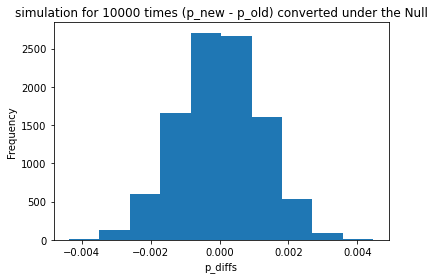

In [68]:
plt.hist(p_diffs);

plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('simulation for 10000 times (p_new - p_old) converted under the Null');

j. What proportion of the **p_diffs** are greater than the actual difference observed in **ab_data.csv**?

In [69]:
# Calculate the actucl difference observed in ab_data
df_control = df.query('group =="control"').converted.mean()
df_treatment= df.query('group =="treatment"').converted.mean()
actual_diff =df_treatment - df_control
print("actucl difference observed={}".format(actual_diff))

#calculate the proportion of p_diffs greater than the observe difference
p_diffs = np.array(p_diffs)
(p_diffs > actual_diff).mean()


actucl difference observed=-0.0014795997940775518


0.8907

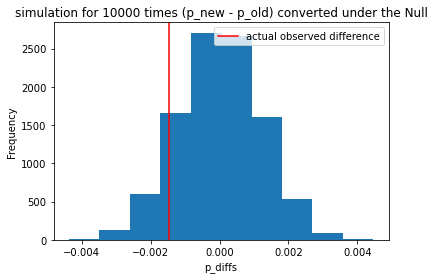

In [70]:
# observed statistic
plt.hist(p_diffs)
plt.axvline(x=actual_diff, color='red', label="actual observed difference")
plt.xlabel('p_diffs')
plt.ylabel('Frequency')
plt.title('simulation for 10000 times (p_new - p_old) converted under the Null');
plt.legend()
plt.show()

k. In words, explain what you just computed in part **j.**  What is this value called in scientific studies?  What does this value mean in terms of whether or not there is a difference between the new and old pages?

**answer:** 
The value above shows that 89.32% is the proportion of the p_diffs 
which is greater than the actual difference observed,
In scientific studies this value is also called p-value of observing the statistic given the Null is true.
As the p-value is large enough, we would fail to reject the Null hypothesis and keep the old page.


l. We could also use a built-in to achieve similar results.  Though using the built-in might be easier to code, the above portions are a walkthrough of the ideas that are critical to correctly thinking about statistical significance. Fill in the below to calculate the number of conversions for each page, as well as the number of individuals who received each page. Let `n_old` and `n_new` refer the the number of rows associated with the old page and new pages, respectively.

In [71]:
import statsmodels.api as sm

convert_old = sum(df2.query("group == 'control'")['converted'])
convert_new = sum(df2.query("group == 'treatment'")['converted'])
n_old = len(df2.query("landing_page == 'old_page'"))
n_new = len(df2.query("landing_page == 'new_page'")) 

print("convert_old={}".format(convert_old))
print("convert_new={}".format(convert_new))

print("n_old={}".format(n_old))
print("n_new={}".format(n_new))

convert_old=17489
convert_new=17264
n_old=145274
n_new=145310


m. Now use `stats.proportions_ztest` to compute your test statistic and p-value.  [Here](http://knowledgetack.com/python/statsmodels/proportions_ztest/) is a helpful link on using the built in.

In [72]:
z_score, p_value = sm.stats.proportions_ztest([convert_old, convert_new], [n_old, n_new],value=None, alternative='smaller')

z_score, p_value

(1.3109241984234394, 0.9050583127590245)

n. What do the z-score and p-value you computed in the previous question mean for the conversion rates of the old and new pages?  Do they agree with the findings in parts **j.** and **k.**?

In [73]:
#z-score with rejection area of 0.05
from scipy.stats import norm
norm.ppf(1-(0.05))

1.6448536269514722

**answer :**


with the z-score and the p_value  in the previous question show that it's fail to reject the Null as z_score is less than The p_value. The Null being the converted rate of the old_page is the same or greater than the converted rate of the new_page.That means we can not be confident with a 95% confidence level that the converted rate of the new_page is larger than the old_page wich is agree with the findings in parts j. and k.

<a id='regression'></a>
### Part III - A regression approach

`1.` In this final part, you will see that the result you acheived in the previous A/B test can also be acheived by performing regression.<br><br>

a. Since each row is either a conversion or no conversion, what type of regression should you be performing in this case?

**Answer:**

As it  binary variable (converted vs not converted). we can use the logistic regression model.

b. The goal is to use **statsmodels** to fit the regression model you specified in part **a.** to see if there is a significant difference in conversion based on which page a customer receives.  However, you first need to create a column for the intercept, and create a dummy variable column for which page each user received.  Add an **intercept** column, as well as an **ab_page** column, which is 1 when an individual receives the **treatment** and 0 if **control**.

In [74]:

df2['intercept']=1

df2[['control', 'ab_page']] = pd.get_dummies(df2['group'])
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,control,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,0,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,0,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,1,0


In [75]:
df2 = df2.drop('control',axis = 1)
df2.head()

,user_id,timestamp,group,landing_page,converted,intercept,ab_page
0,851104,2017-01-21 22:11:48.556739,control,old_page,0,1,0
1,804228,2017-01-12 08:01:45.159739,control,old_page,0,1,0
2,661590,2017-01-11 16:55:06.154213,treatment,new_page,0,1,1
3,853541,2017-01-08 18:28:03.143765,treatment,new_page,0,1,1
4,864975,2017-01-21 01:52:26.210827,control,old_page,1,1,0


c. Use **statsmodels** to import your regression model.  Instantiate the model, and fit the model using the two columns you created in part **b.** to predict whether or not an individual converts.

In [76]:
import statsmodels.api as sm

logit_mod  = sm.Logit(df2['converted'],df2[['intercept','ab_page']])
results = logit_mod.fit()

Optimization terminated successfully.
         Current function value: 0.366118
         Iterations 6


d. Provide the summary of your model below, and use it as necessary to answer the following questions.

In [77]:

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290582
Method:                           MLE   Df Model:                            1
Date:                Mon, 24 May 2021   Pseudo R-squ.:               8.077e-06
Time:                        04:39:54   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1899
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -1.9888      0.008   -246.669      0.000      -2.005      -1.973
ab_page       -0.0150      0.011     -1.311      0.190      -0.037       0.007
==============================================================================
"""

e. What is the p-value associated with **ab_page**? Why does it differ from the value you found in **Part II**?<br><br>  **Hint**: What are the null and alternative hypotheses associated with your regression model, and how do they compare to the null and alternative hypotheses in the **Part II**?

**Answer :**

The p-value associated with ab_page is 0.19 and it is  greater than the type I error rate 0.05.so it fail to reject the null.
in part II, it was a one-sided test, where in the logistic regression part, it is two-sided test, thats why it's diff.


f. Now, you are considering other things that might influence whether or not an individual converts.  Discuss why it is a good idea to consider other factors to add into your regression model.  Are there any disadvantages to adding additional terms into your regression model?

**Answer :**

yes, it is goog idea considering other factors like location or age that leads to more accurate decisions and give us significant results.
disadvantage is that the model may gets more complex and difficult to analyze..


g. Now along with testing if the conversion rate changes for different pages, also add an effect based on which country a user lives. You will need to read in the **countries.csv** dataset and merge together your datasets on the approporiate rows.  [Here](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.join.html) are the docs for joining tables. 

Does it appear that country had an impact on conversion?  Don't forget to create dummy variables for these country columns - **Hint: You will need two columns for the three dummy variables.** Provide the statistical output as well as a written response to answer this question.

In [78]:
countries_df = pd.read_csv('./countries.csv')
df_new = countries_df.set_index('user_id').join(df2.set_index('user_id'), how='inner')

In [79]:
df_new['country'].unique() # the countries


array(['UK', 'US', 'CA'], dtype=object)

In [81]:
# Create the dummy variables
df_new[['CA', 'UK', 'US']] = pd.get_dummies(df_new['country'])
df_new = df_new.drop(['CA'], axis=1)
df_new.head()

,country,timestamp,group,landing_page,converted,intercept,ab_page,UK,US
user_id,,,,,,,,,
834778,UK,2017-01-14 23:08:43.304998,control,old_page,0,1,0,1,0
928468,US,2017-01-23 14:44:16.387854,treatment,new_page,0,1,1,0,1
822059,UK,2017-01-16 14:04:14.719771,treatment,new_page,1,1,1,1,0
711597,UK,2017-01-22 03:14:24.763511,control,old_page,0,1,0,1,0
710616,UK,2017-01-16 13:14:44.000513,treatment,new_page,0,1,1,1,0


h. Though you have now looked at the individual factors of country and page on conversion, we would now like to look at an interaction between page and country to see if there significant effects on conversion.  Create the necessary additional columns, and fit the new model.  

Provide the summary results, and your conclusions based on the results.

In [84]:
### Fit Your Linear Model And Obtain the Results
logit_mod = sm.Logit(df_new['converted'], df_new[['intercept','ab_page', 'US', 'UK']])
results = logit_mod.fit()
results.summary()

Optimization terminated successfully.
         Current function value: 0.366113
         Iterations 6


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              converted   No. Observations:               290584
Model:                          Logit   Df Residuals:                   290580
Method:                           MLE   Df Model:                            3
Date:                Mon, 24 May 2021   Pseudo R-squ.:               2.323e-05
Time:                        05:33:26   Log-Likelihood:            -1.0639e+05
converged:                       True   LL-Null:                   -1.0639e+05
Covariance Type:            nonrobust   LLR p-value:                    0.1760
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     -2.0300      0.027    -76.249      0.000      -2.082      -1.978
ab_page       -0.0149      0.011     -1.307      0.191      -0.037       0.007
US             0.0408      0.027      1.516      0.130      -0.012       0.093
UK             0.0506      0.028      1.784      0.074      -0.005       0.106
==============================================================================
"""

<a id='conclusions'></a>
## Conclusions
The data set is good represented there is no missing value. 

there is no strong evidence that the new page is better,
The p-values for the independent variables are all above 0.05,
so it's better to keep the old pages untill they do more analysis 

after adding country factor , we may say there is no significant effect  based on the country as the countries have almost similar results.
